## BAB 11

## Teori Network Analysis

#### Membuat Network menggunakan library NetworkX

In [1]:
pip install networkx

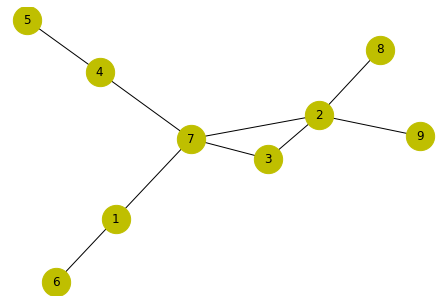

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
vertices = range(1,10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (1,6), (1,7), (2,8), (2,9)]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color='y', node_size=800)

Analisa Degree Centrality 
Degree centrality is a measure of the number of connections a particular node has in the network. The people most popular or more liked usually are the ones who have more friends.


In [3]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.125,
 6: 0.125,
 7: 0.5,
 8: 0.125,
 9: 0.125}

Analisa Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes.


In [4]:
nx.betweenness_centrality(G)

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.25,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

Analisa Closeness Centrality 

In [5]:
nx.closeness_centrality(G)

{1: 0.47058823529411764,
 2: 0.5714285714285714,
 3: 0.5,
 4: 0.47058823529411764,
 5: 0.3333333333333333,
 6: 0.3333333333333333,
 7: 0.6666666666666666,
 8: 0.38095238095238093,
 9: 0.38095238095238093}

Mengukur Eigenvector Centrality..
Eigenvector memberikan nilai kepada semua simpul dalam suatu grafik dengan mengukur tingkat kepentingannya dalam suatu network


In [6]:
centrality = nx.eigenvector_centrality(G)

In [7]:
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

[(1, '0.25'),
 (2, '0.53'),
 (3, '0.42'),
 (4, '0.25'),
 (5, '0.10'),
 (6, '0.10'),
 (7, '0.56'),
 (8, '0.20'),
 (9, '0.20')]

### Membuat Network berdasarkan data pemodelan facebook dari Stanford

Muat data untuk dibentuk edge list nya

In [8]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

Print informasi jumlah nodes dan edges

In [9]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


Visualisasi network berdasarkan degree dan betweenness centrality

(-0.850298747420311,
 0.9277480095624924,
 -1.0863648444414138,
 0.8136617332696915)

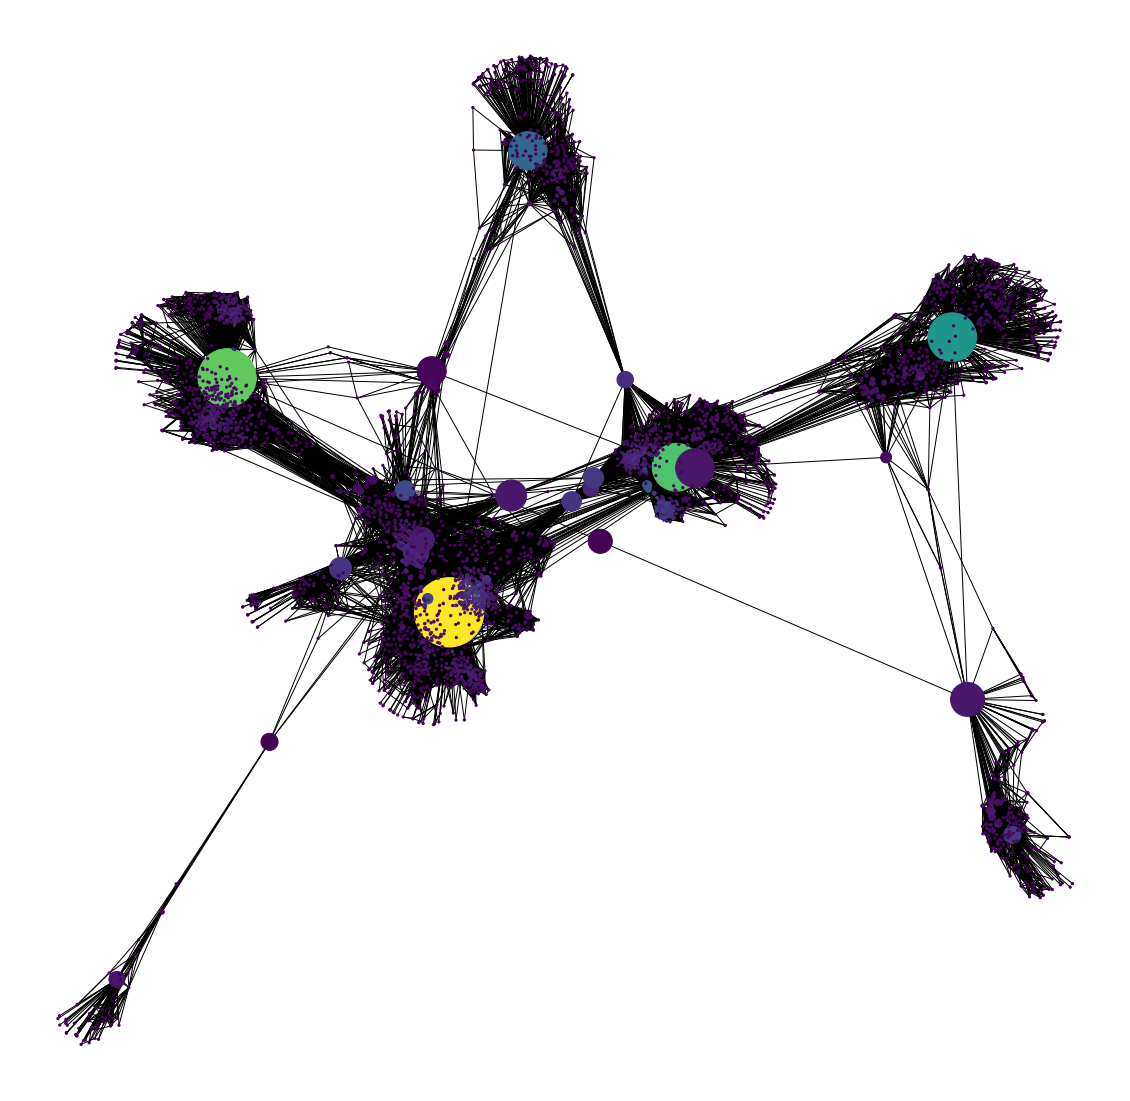

In [10]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [2000.0*G_fb.degree(v) for v in G_fb]
node_size = [v* 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                node_color=node_color,
                node_size=node_size)
plt.axis('off')